## Convolution

### 1D convolution
* Convolution is a mathematical operation for combining two functions, one of the functions (in this case g) is usually called a kernel
* $(f*g)[j] = \sum_{i=0} ^n f[i]*g[n-i]$
   * $n$ is the lenght of the kernel g
* This equation is not directly applicable to graphs since graph don't follow a regula strcuture
* There is a direct relationship between Convolution and Frourier transformation
* Fourier transformation is directly related to Laplacian opertator; hence, convolution can be computed based on Fourier transformation and propertise of the laplacian.
* In the context of graph convolution, Laplacian of a graph is used for defining Convolution operation on the graphs.

## Graph convolution using PyTorch Geometric


In [1]:
import torch
import networkx as nx

from torch_geometric.datasets import ZINC
from torch_geometric.utils import to_networkx

from torch_geometric.nn import GCNConv

In [2]:
#  ! pip install torch_sparse

In [3]:
graph_dataset = ZINC(root='dataset')

Extracting dataset/molecules.zip
Processing...
Processing test dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 15254.59it/s]
Done!


In [4]:
graph = graph_dataset[2]

In [5]:
graph

Data(x=[26, 1], edge_index=[2, 58], edge_attr=[58], y=[1])

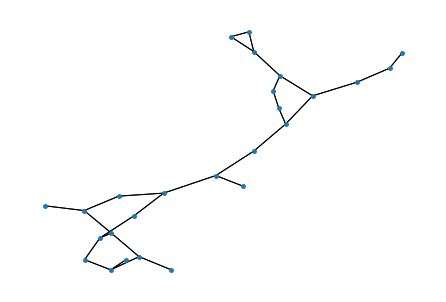

In [6]:
G = to_networkx(graph)
nx.draw(G, node_size=15,arrows=False)

In [7]:
conv_operator = GCNConv(in_channels=1, out_channels=32)
output_conv = conv_operator(graph.x.float(), graph.edge_index)
print(output_conv.shape)

torch.Size([26, 32])
